In [104]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [105]:
# import the dataset
df=pd.read_csv("C:\\Users\\harsh\\Downloads\\archive (1).zip")

In [106]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [107]:
#information about the dataset
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [108]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [109]:
df.shape

(150, 6)

In [110]:
df.drop('Id',axis=1,inplace=True)

In [111]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [112]:
# count the value
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [113]:
# finding the null value
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

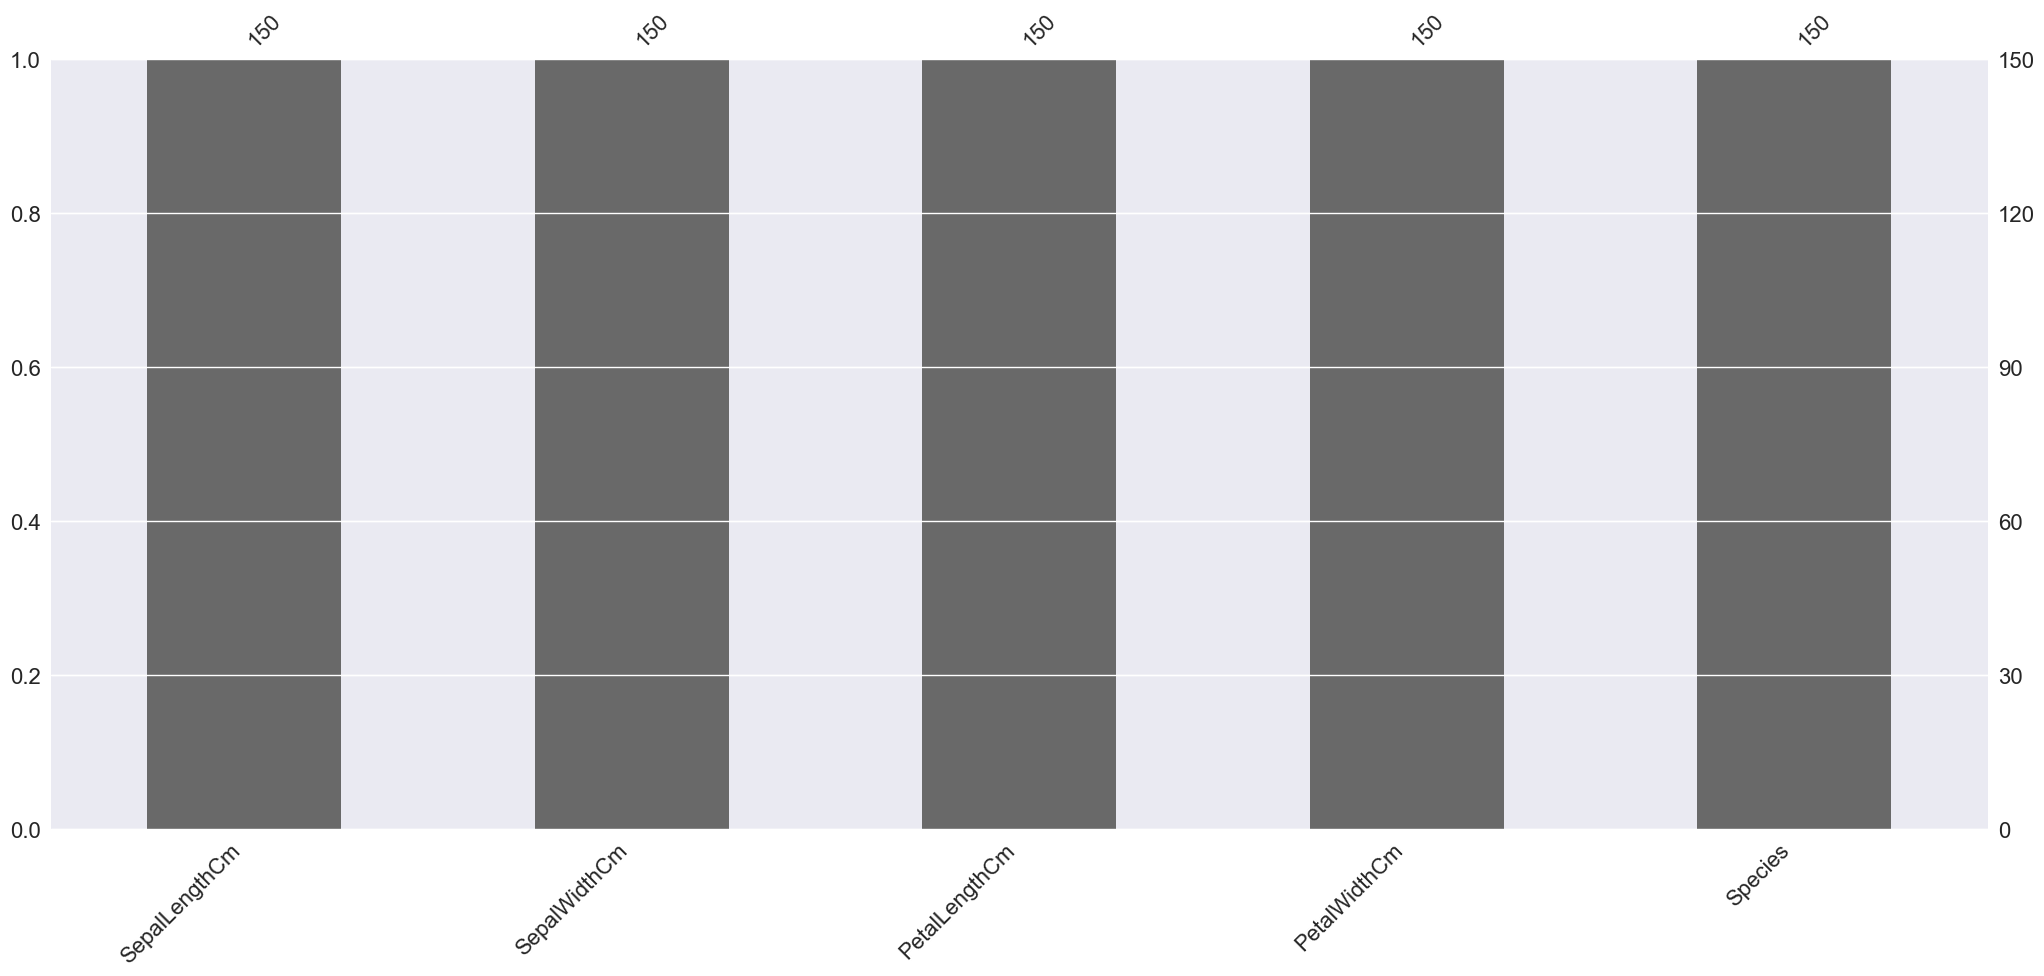

In [114]:
!pip install missingno
import missingno as msno
msno.bar(df)

In [115]:
df.drop_duplicates(inplace=True)

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

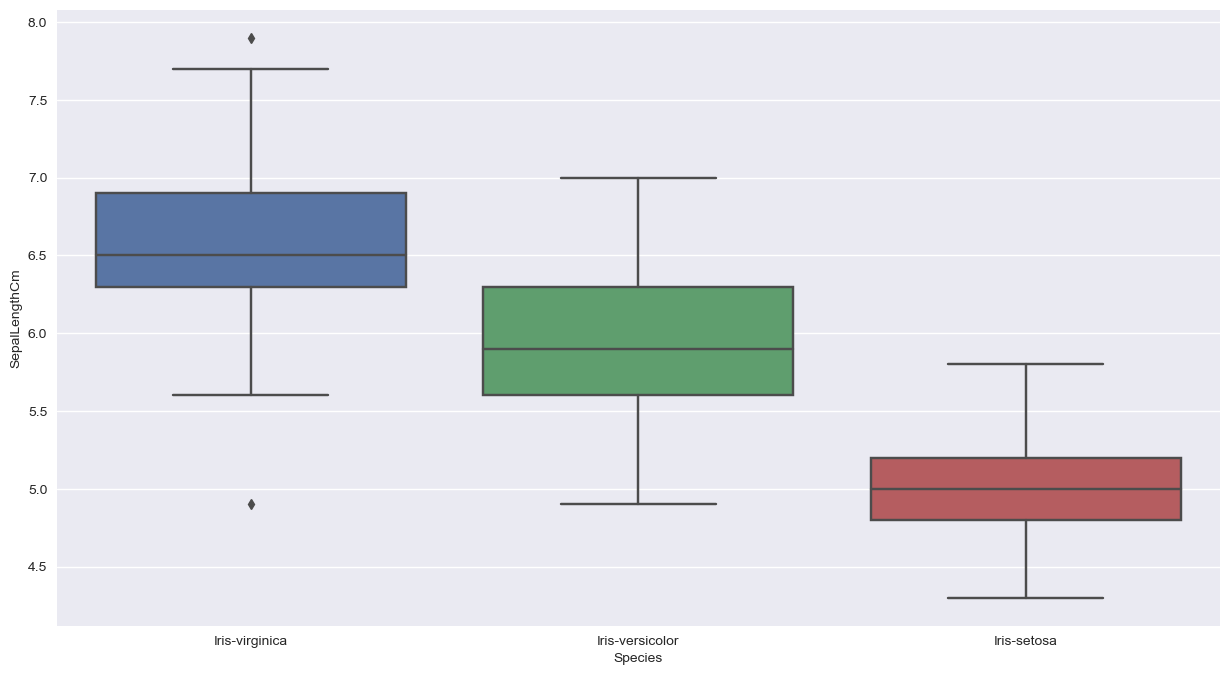

In [116]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Species',y='SepalLengthCm',data=df.sort_values('SepalLengthCm',ascending=False))

<Axes: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

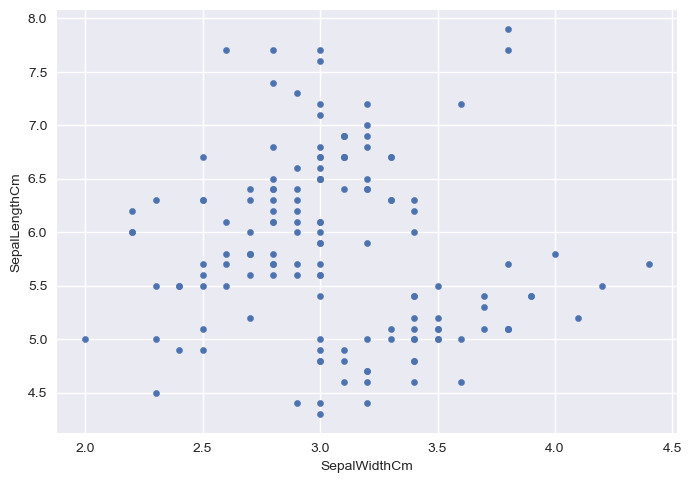

In [117]:
df.plot(kind='scatter',x='SepalWidthCm',y='SepalLengthCm')

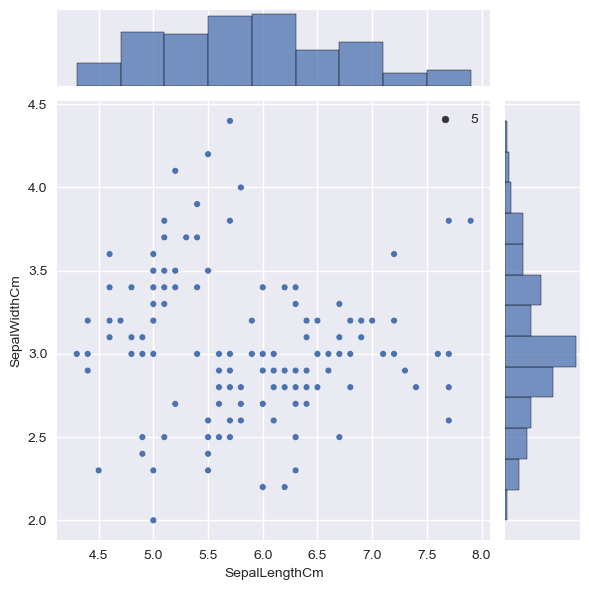

In [118]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, size=5)

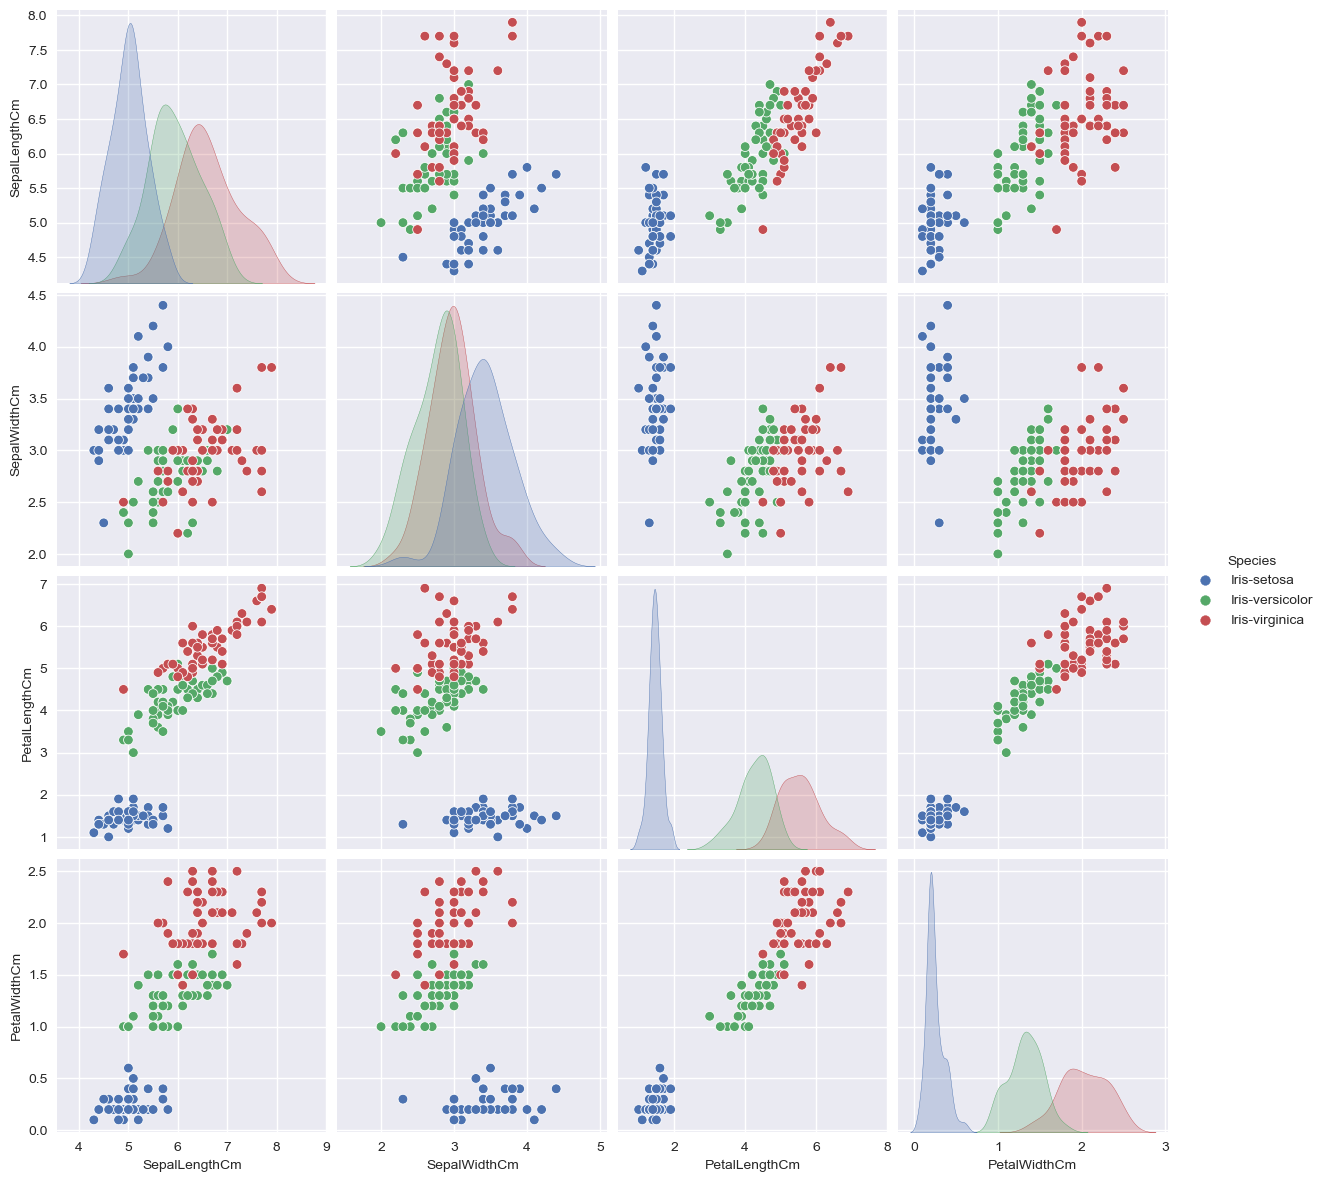

In [119]:
sns.pairplot(df, hue="Species", size=3)

array([[<Axes: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

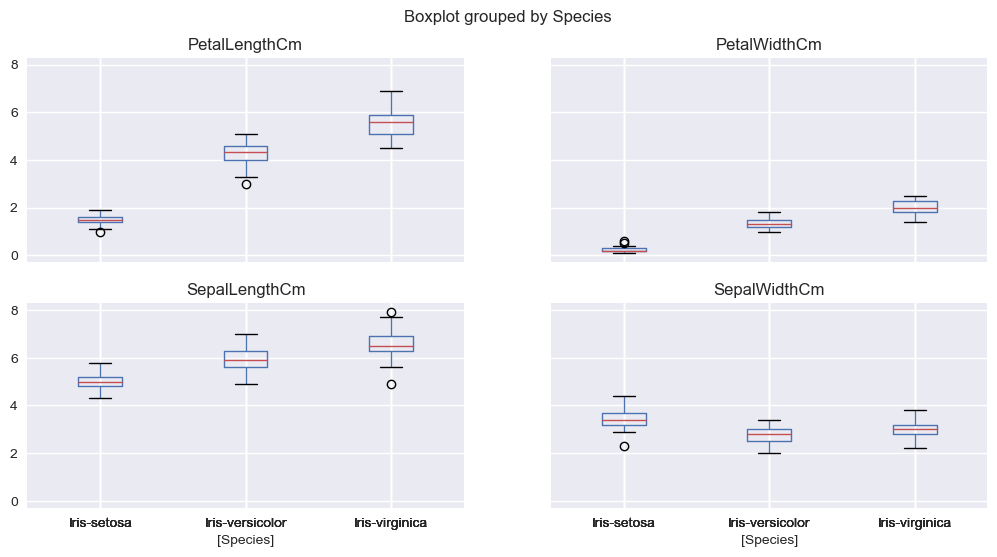

In [120]:
df.boxplot(by="Species", figsize=(12, 6))

<Axes: >

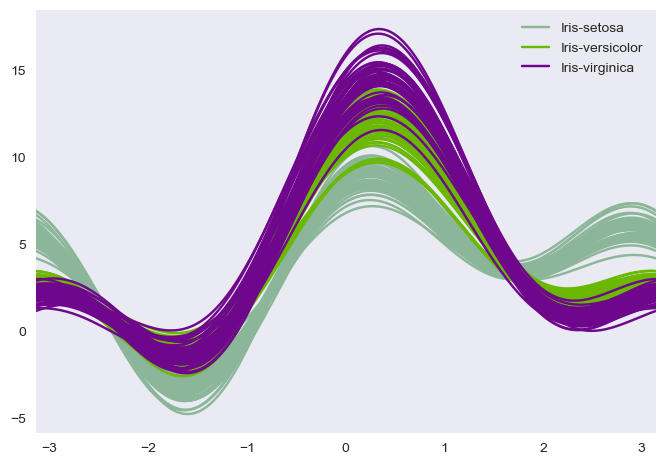

In [121]:
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(df, "Species")

<Figure size 1500x1500 with 0 Axes>

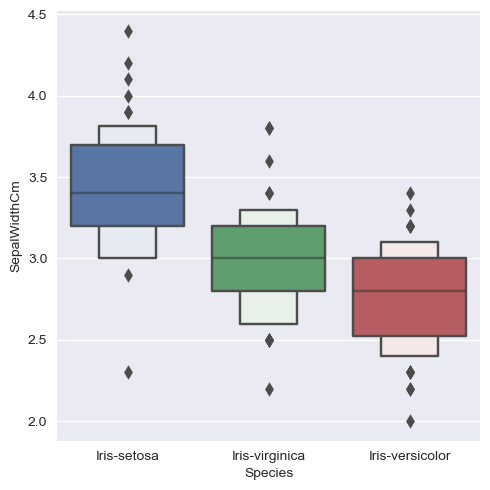

In [122]:
plt.figure(figsize=(15,15))
sns.catplot(x='Species',y='SepalWidthCm',data=df.sort_values('SepalWidthCm',ascending=False),kind='boxen')

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

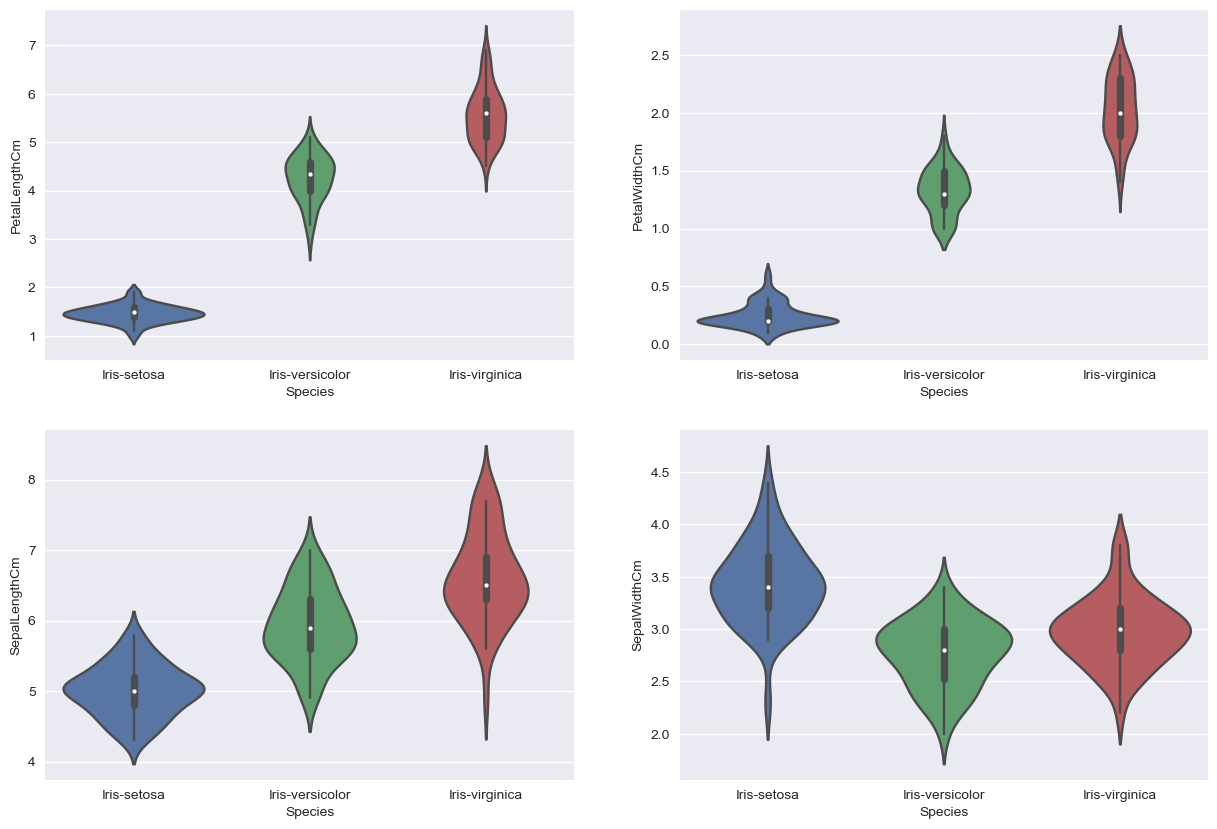

In [123]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

In [124]:
X=df.drop('Species',axis=1)
y=df['Species']

In [125]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [126]:
df['Species'] = pd.Categorical(df.Species)
df['Species'] = df.Species.cat.codes
y = to_categorical(df.Species)

In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=123)

In [128]:
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(4,)))

model.add(Dense(3,activation='softmax'))

In [129]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [130]:
history=model.fit(X_train,y_train,epochs=45,validation_data=(X_test, y_test))

Epoch 1/45
4/4 [==============================] - 1s 147ms/step - loss: 1.0255 - accuracy: 0.3333 - val_loss: 0.9507 - val_accuracy: 0.3333
Epoch 2/45
4/4 [==============================] - 0s 21ms/step - loss: 0.9435 - accuracy: 0.4608 - val_loss: 0.8941 - val_accuracy: 0.7556
Epoch 3/45
4/4 [==============================] - 0s 24ms/step - loss: 0.8930 - accuracy: 0.7941 - val_loss: 0.8484 - val_accuracy: 0.8889
Epoch 4/45
4/4 [==============================] - 0s 23ms/step - loss: 0.8557 - accuracy: 0.7843 - val_loss: 0.8070 - val_accuracy: 0.8889
Epoch 5/45
4/4 [==============================] - 0s 31ms/step - loss: 0.8154 - accuracy: 0.8235 - val_loss: 0.7729 - val_accuracy: 0.8889
Epoch 6/45
4/4 [==============================] - 0s 25ms/step - loss: 0.7821 - accuracy: 0.8627 - val_loss: 0.7419 - val_accuracy: 0.9111
Epoch 7/45
4/4 [==============================] - 0s 28ms/step - loss: 0.7497 - accuracy: 0.8824 - val_loss: 0.7107 - val_accuracy: 0.7333
Epoch 8/45
4/4 [==========

In [131]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.3469 - accuracy: 1.0000


[0.3468930423259735, 1.0]

In [132]:
pred = model.predict(X_test[:10])
print(pred)

1/1 [==============================] - 0s 110ms/step
[[0.00215822 0.34028995 0.6575518 ]
 [0.00138354 0.29827026 0.7003462 ]
 [0.05818521 0.6478721  0.29394272]
 [0.02732554 0.579042   0.39363244]
 [0.9360705  0.06030191 0.0036276 ]
 [0.02920195 0.64336705 0.32743096]
 [0.00169336 0.26435956 0.73394704]
 [0.00196821 0.28049543 0.7175364 ]
 [0.935904   0.06067148 0.00342454]
 [0.00604047 0.41672862 0.577231  ]]


In [133]:
p=np.argmax(pred,axis=1)
print(p)
print(y_test[:10])

[2 2 1 1 0 1 2 2 0 2]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [134]:
history.history['accuracy']

[0.3333333432674408,
 0.46078431606292725,
 0.7941176295280457,
 0.7843137383460999,
 0.8235294222831726,
 0.8627451062202454,
 0.8823529481887817,
 0.686274528503418,
 0.656862735748291,
 0.656862735748291,
 0.656862735748291,
 0.7450980544090271,
 0.9411764740943909,
 0.9313725233078003,
 0.8235294222831726,
 0.8333333134651184,
 0.8725489974021912,
 0.8333333134651184,
 0.7843137383460999,
 0.813725471496582,
 0.8823529481887817,
 0.9509803652763367,
 0.9313725233078003,
 0.9411764740943909,
 0.970588207244873,
 0.9509803652763367,
 0.9117646813392639,
 0.9019607901573181,
 0.9019607901573181,
 0.8823529481887817,
 0.813725471496582,
 0.8627451062202454,
 0.9117646813392639,
 0.9607843160629272,
 0.9509803652763367,
 0.8627451062202454,
 0.813725471496582,
 0.9411764740943909,
 0.9411764740943909,
 0.9313725233078003,
 0.970588207244873,
 0.9607843160629272,
 0.970588207244873,
 0.970588207244873,
 0.970588207244873]

In [135]:
history.history['val_accuracy']

[0.3333333432674408,
 0.7555555701255798,
 0.8888888955116272,
 0.8888888955116272,
 0.8888888955116272,
 0.9111111164093018,
 0.7333333492279053,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6888889074325562,
 0.8666666746139526,
 0.9555555582046509,
 0.8222222328186035,
 0.8222222328186035,
 0.8444444537162781,
 0.8222222328186035,
 0.7777777910232544,
 0.7777777910232544,
 0.8222222328186035,
 0.9555555582046509,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9555555582046509,
 0.8888888955116272,
 0.8444444537162781,
 0.8444444537162781,
 0.8444444537162781,
 0.8222222328186035,
 0.8222222328186035,
 0.8444444537162781,
 0.9555555582046509,
 0.9555555582046509,
 0.8444444537162781,
 0.7777777910232544,
 0.8444444537162781,
 0.9777777791023254,
 0.9555555582046509,
 1.0,
 0.9555555582046509,
 0.9555555582046509,
 1.0,
 0.9777777791023254,
 1.0]

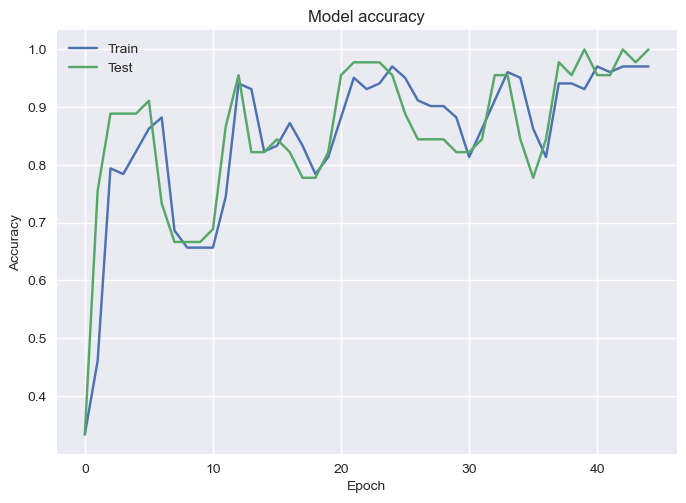

In [136]:
plt.figure()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()